In [ ]:
import os
os.chdir('..')  #cd to project folder

import pandas as pd
import yaml
from pathlib import Path
from rdkit import Chem
from rdkit.Chem import Draw
from IPython.display import display

ADD description

The following structures were removed from the SPARQL output for piperidine:


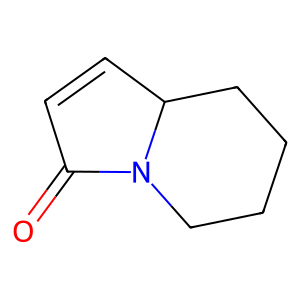

In [2]:
scaffold = 'piperidine' #select scaffold from benzylisoquinoline, seco-bia, aporphine, piperolactam, piperidine

#import config
with open('config/lcms.yaml', 'r') as file:
    config = yaml.safe_load(file)

#display substructures being filtered
struct_to_remove = config['unwanted_structures'].get(scaffold)

if struct_to_remove:
    struct_to_remove = [Chem.MolFromSmiles(s) for s in struct_to_remove]
    img = Draw.MolsToGridImage(struct_to_remove, molsPerRow=len(struct_to_remove), subImgSize=(300, 300))
    print(f"The following structures were removed from the SPARQL output for {scaffold}:")
    display(img)
else:
    print(f"No structures to remove for {scaffold}")

Raw SPARQL output for piperidine imported from data/wikidata/piperidine_in_genera.csv.
23 structures removed from the SPARQL output for piperidine
The following structures were removed from the raw SPARQL output for piperidine:


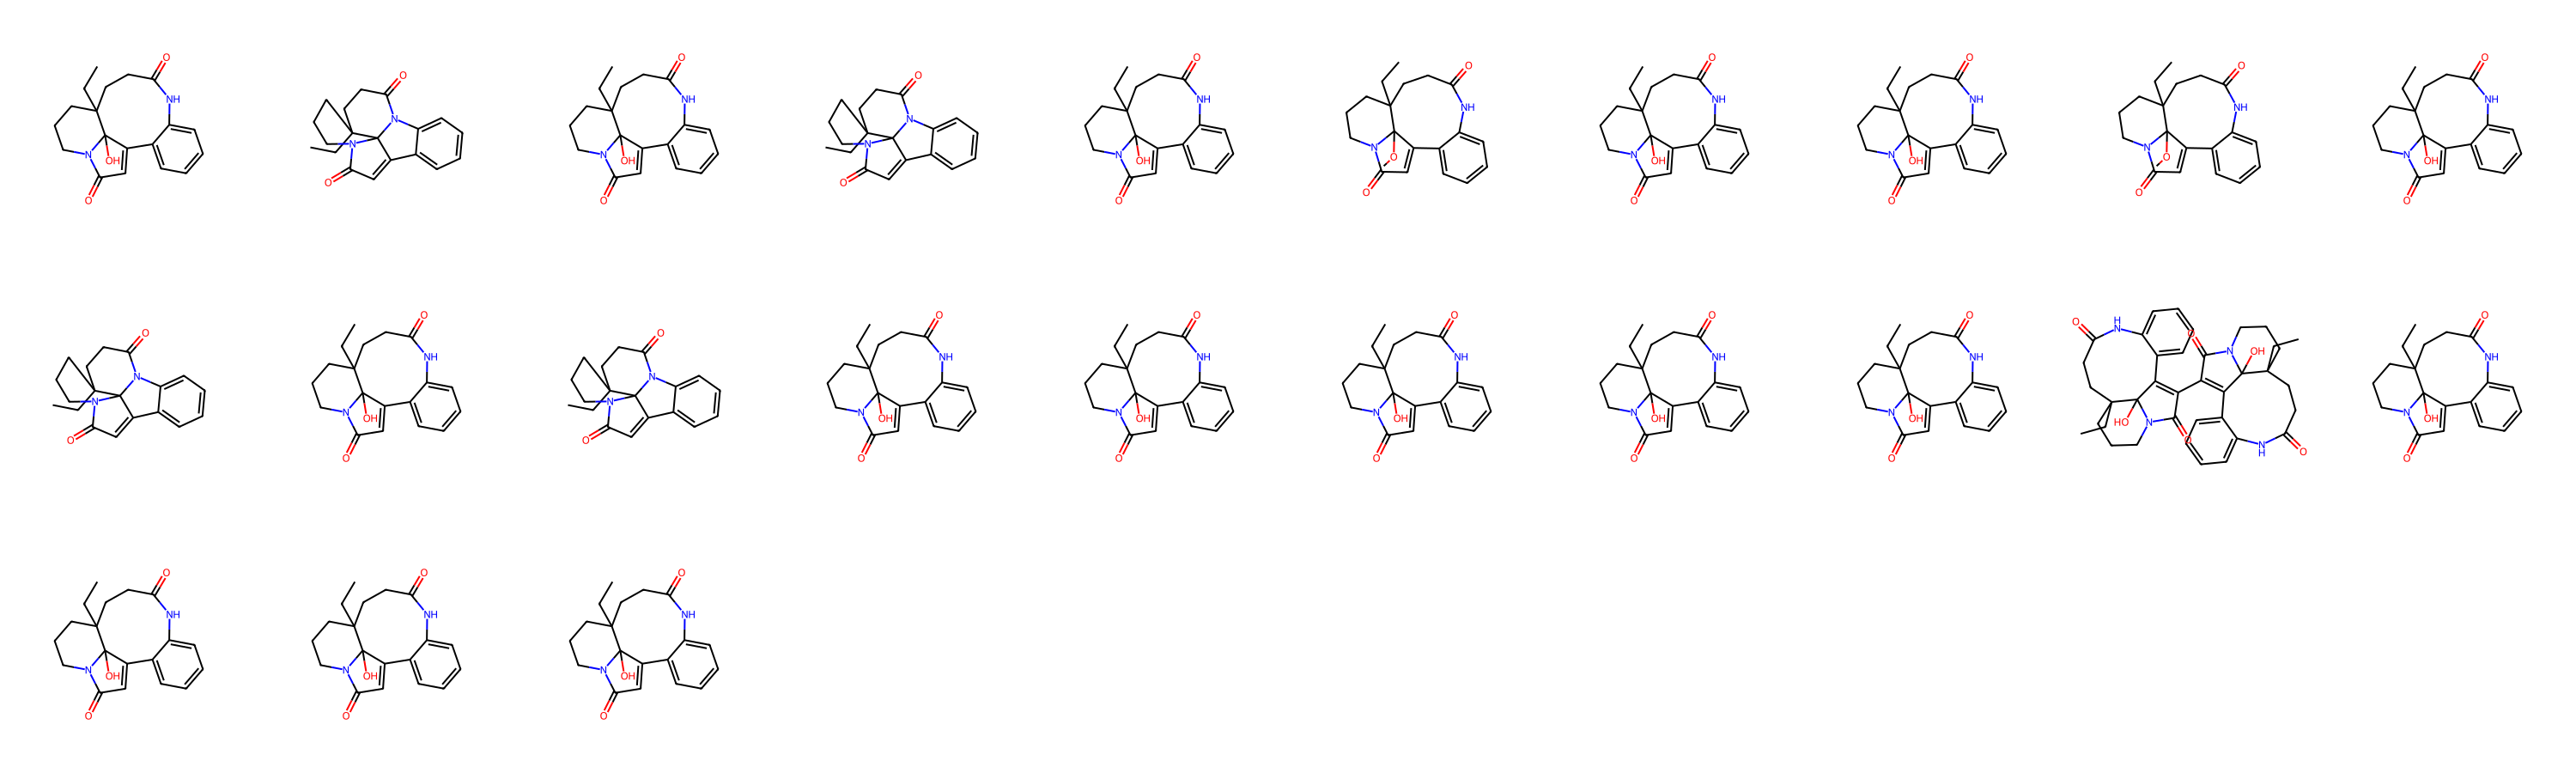

In [3]:
#import raw SPARQL output
data_path = Path(config['sparql_results'].get(scaffold))
data = pd.read_csv(data_path)
print(f'Raw SPARQL output for {scaffold} imported from {data_path}.')

#create 'structure' column
data.loc[:, 'structure'] = data['smiles'].map(Chem.MolFromSmiles) #create 'structure' column

#filter unwanted structures
def check_substructure(mol, substruct_list):
    return mol is not None and any(mol.HasSubstructMatch(sub) for sub in substruct_list)

ids_to_remove = data['structure'].apply(lambda mol: check_substructure(mol, struct_to_remove))
data_clean = data[~ids_to_remove] #remove matched substructures
print(f'{ids_to_remove.sum()} structures removed from the SPARQL output for {scaffold}')

#display removed structures
removed_struct = data[ids_to_remove]['structure']
if not removed_struct.empty:
    print(f'The following structures were removed from the raw SPARQL output for {scaffold}:')
    img = Draw.MolsToGridImage(data[ids_to_remove]['structure'], molsPerRow=10, subImgSize=(300, 300))
    display(img)

In [4]:
#save clean data
output_path = data_path.with_name(data_path.stem + '_clean' + data_path.suffix) #create new filename
data_clean.to_csv(output_path, index=False)
print(f'Cleaned data saved in {output_path}')

Cleaned data saved in data/wikidata/piperidine_in_genera_clean.csv
